How to run a stellar evolution code
====================

Here we will generate initial conditions for a stellar evolution code. We will adopt a parametrized stellar evolution code.

For reference you can read chapter 3 of Portegies Zwart & McMillan 2018 (2018araa.book.....P). 

With this tutorial you will learn
- how to generate inital conditions (mass-function)
- how to run a parametrized stellar evolution code
- channels and data transfer
- plotting results

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot
from amuse.units import units
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 15.0

from amuse.community.seba.interface import SeBa
from amuse.plot import plot
from amuse.plot import scatter

from amuse.datamodel import Particles
from amuse.lab import new_kroupa_mass_distribution
from amuse.lab import new_salpeter_mass_distribution

We start by setting up a simulation by specifying the initial mass function. What would you say is the biggest difference between these IMFs?

<span style="color:purple;font-weight:700">
    The Salpeter IMF looks like the slope is constant, while the Kroupa IMF looks 'flatter' at lower stellar masses. The Kroupa IMF also consistently has a higher mean mass than the Salpeter IMF. 
</span>

mean-mass for Kroupa= 0.571209727615 MSun
mean-mass for Salpeter= 0.304954261257 MSun


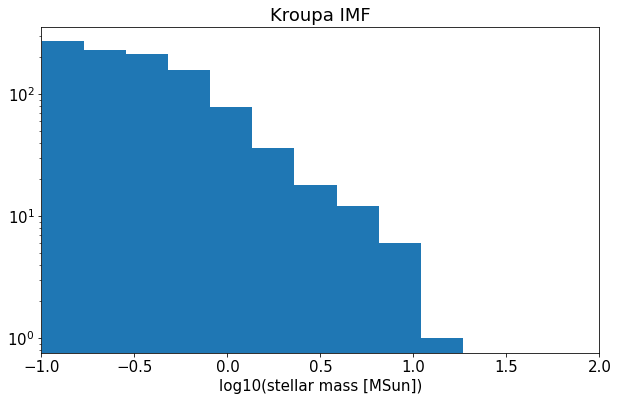

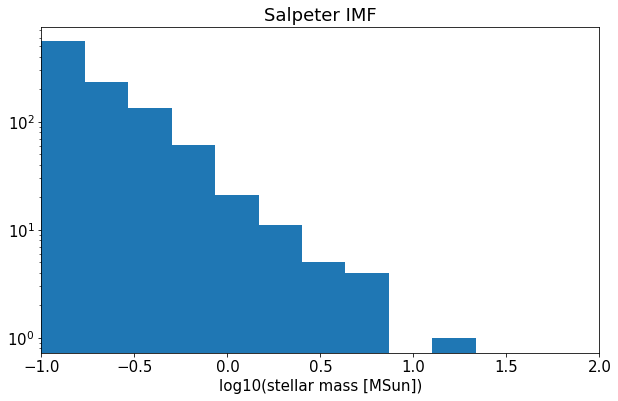

In [2]:
from amuse.datamodel import Particles
n_stars = 1024
mmin = 0.1 | units.MSun
mmax = 100 | units.MSun

from amuse.lab import new_kroupa_mass_distribution
mkroupa = new_kroupa_mass_distribution(n_stars,
                                           mass_min=mmin, 
                                           mass_max=mmax)
k_stars = Particles(mass=mkroupa)
from amuse.lab import new_salpeter_mass_distribution
msalpeter = new_salpeter_mass_distribution(n_stars, 
                                           mass_min=mmin, 
                                           mass_max=mmax)
s_stars = Particles(mass=msalpeter)
print("mean-mass for Kroupa=", numpy.mean(k_stars.mass))
print("mean-mass for Salpeter=", numpy.mean(s_stars.mass))

pyplot.hist(numpy.log10(k_stars.mass.value_in(units.MSun)))
pyplot.xlabel('log10(stellar mass [MSun])')
pyplot.title('Kroupa IMF')
pyplot.yscale('log')
pyplot.xlim(-1, 2)
pyplot.figure()
pyplot.hist(numpy.log10(s_stars.mass.value_in(units.MSun)))
pyplot.xlabel('log10(stellar mass [MSun])')
pyplot.title('Salpeter IMF')
pyplot.yscale('log')
pyplot.xlim(-1, 2)
pyplot.show()

Now that the mass functions are determined, we can evolve the stars in time. For this we start two stellar evolution codes, both parametrized, and evolve the stars in time.

In [3]:
from amuse.community.seba.interface import SeBa
def start_stellar_code(stars):
    stellar = SeBa()
    stellar.particles.add_particles(stars)
    channels = {"to_stars": stellar.particles.new_channel_to(stars), 
                "to_stellar": stars.new_channel_to(stellar.particles)}
    return stellar, channels
kstellar, kchannels = start_stellar_code(k_stars)
sstellar, schannels = start_stellar_code(s_stars)

Now the stellar evolution code are declared. Now evolve in time and calculate the mean mass as a function of time.

In [4]:
times = 10**numpy.arange(0.0, 4.0, 0.1) | units.Myr
kmean = []
smean = []
mmean = []
for time in times:
    kstellar.evolve_model(time)
    kchannels["to_stars"].copy()
    sstellar.evolve_model(time)
    schannels["to_stars"].copy()
    mmean.append(numpy.mean(k_stars.mass)/numpy.mean(s_stars.mass))
    kmean.append(numpy.mean(k_stars.mass).number)
    smean.append(numpy.mean(s_stars.mass).number)
kstellar.stop()
sstellar.stop()
print("mean-mass for Kroupa=", numpy.mean(k_stars.mass))
print("mean-mass for Salpeter=", numpy.mean(s_stars.mass))

mean-mass for Kroupa= 0.376232933611 MSun
mean-mass for Salpeter= 0.244518969822 MSun


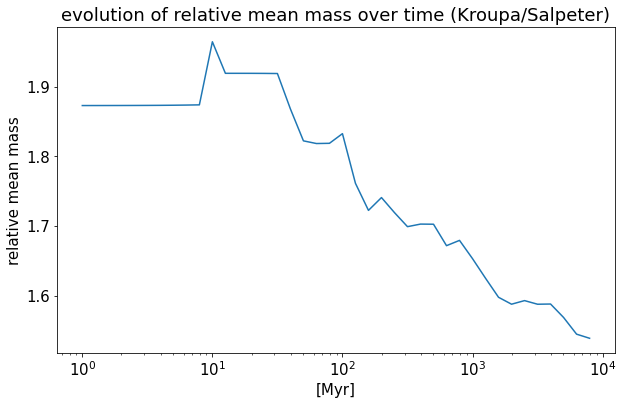

'\nplot(times, smean)\npyplot.ylabel("Salpeter mean mass [MSun]")\npyplot.semilogx()\npyplot.title("Salpeter population")\npyplot.show()\n'

In [5]:
from amuse.plot import plot
plot(times, mmean)
pyplot.title("evolution of relative mean mass over time (Kroupa/Salpeter)")
pyplot.ylabel("relative mean mass")
pyplot.semilogx()
pyplot.show()
'''
plot(times, kmean)
pyplot.ylabel("Kroupa mean mass [MSun]")
pyplot.semilogx()
pyplot.title("Kroupa population")
pyplot.show()
'''
'''
plot(times, smean)
pyplot.ylabel("Salpeter mean mass [MSun]")
pyplot.semilogx()
pyplot.title("Salpeter population")
pyplot.show()
'''

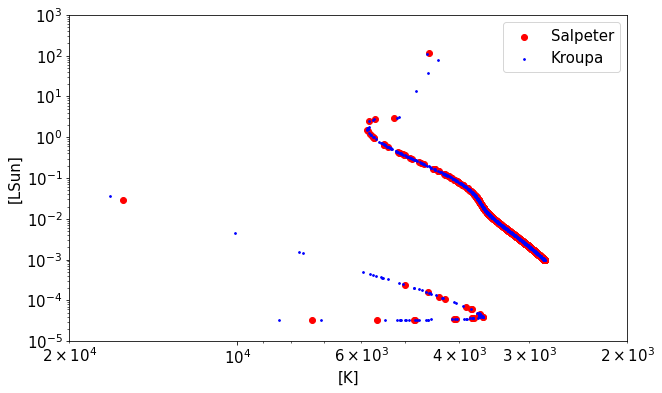

In [6]:
from amuse.plot import scatter
scatter(s_stars.temperature, s_stars.luminosity, c='r', label='Salpeter')
scatter(k_stars.temperature, k_stars.luminosity, c='b', s=3, label='Kroupa')
pyplot.xlim(2.e+4, 2000)
pyplot.ylim(1.e-5, 1000)
pyplot.loglog()
pyplot.legend()
pyplot.show()

You have calculated the evolution of a stellar population with solar metalicity.

Assignments and questions:
---------------

### Assignment 1:
Run the notebook and describe the evolution of the relative mean stellar mass. Why does it drop with time?

<span style="color:purple;font-weight:700">
    The mean mass of the Salpeter population and Kroupa population both decrease over time, but the Kroupa population's mass decreases faster, so (Kroupa/Salpeter) also decreases. The Kroupa IMF contains more heavy stars, suggesting that those lose mass fastest.
</span>

### Assignment 2:
Compare the mean mass of two stellar populations with different metalicity, 0.02 (solar) and 0.002 (one tenth times solar) but the same stellar masses.

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from amuse.units import units
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 17.0

from amuse.community.seba.interface import SeBa
from amuse.plot import plot
from amuse.plot import scatter

from amuse.datamodel import Particles
from amuse.lab import new_kroupa_mass_distribution
from amuse.lab import new_salpeter_mass_distribution

In [8]:
n_stars = 1024
mmin = 0.1 | units.MSun
mmax = 100 | units.MSun

def start_stellar_code(stars, z=.02):
    stellar = SeBa()
    stellar.parameters.metallicity = z
    stellar.particles.add_particles(stars)
    channels = {"to_stars": stellar.particles.new_channel_to(stars), 
                "to_stellar": stars.new_channel_to(stellar.particles)}
    return stellar, channels

times = 10**np.arange(0.0, 4.0, 0.1) | units.Myr
kmean1 = []
kmean2 = []
smean1 = []
smean2 = []


mkroupa = new_kroupa_mass_distribution(n_stars, mass_min=mmin, mass_max=mmax)

k_stars1 = Particles(mass=mkroupa)
kstellar1, kchannels1 = start_stellar_code(k_stars1)

k_stars2 = Particles(mass=mkroupa)
kstellar2, kchannels2 = start_stellar_code(k_stars2, z=0.002)

for time in times:
    kstellar1.evolve_model(time)
    kchannels1["to_stars"].copy()
    kstellar2.evolve_model(time)
    kchannels2["to_stars"].copy()
    kmean1.append(np.mean(k_stars1.mass).number)
    kmean2.append(np.mean(k_stars2.mass).number)
kstellar1.stop()
kstellar2.stop()

msalpeter = new_salpeter_mass_distribution(n_stars, mass_min=mmin, mass_max=mmax)

s_stars1 = Particles(mass=msalpeter)
sstellar1, schannels1 = start_stellar_code(s_stars1)

s_stars2 = Particles(mass=msalpeter)
sstellar2, schannels2 = start_stellar_code(s_stars2, z=0.002)

for time in times:
    
    sstellar1.evolve_model(time)
    schannels1["to_stars"].copy()
    sstellar2.evolve_model(time)
    schannels2["to_stars"].copy()
    smean1 = np.append(smean1, np.mean(s_stars1.mass).number)
    smean2 = np.append(smean2, np.mean(s_stars2.mass).number)
sstellar1.stop()
sstellar2.stop()
print("mean-mass for Kroupa, z=0.02: ", np.mean(k_stars1.mass))
print("mean-mass for Kroupa, z=0.002: ", np.mean(k_stars2.mass))
print("mean-mass for Salpeter, z=0.02: ", np.mean(s_stars1.mass))
print("mean-mass for Salpeter, z=0.002: ", np.mean(s_stars2.mass))

mean-mass for Kroupa, z=0.02:  0.379186703311 MSun
mean-mass for Kroupa, z=0.002:  0.401980390635 MSun
mean-mass for Salpeter, z=0.02:  0.244444899845 MSun
mean-mass for Salpeter, z=0.002:  0.240208138511 MSun


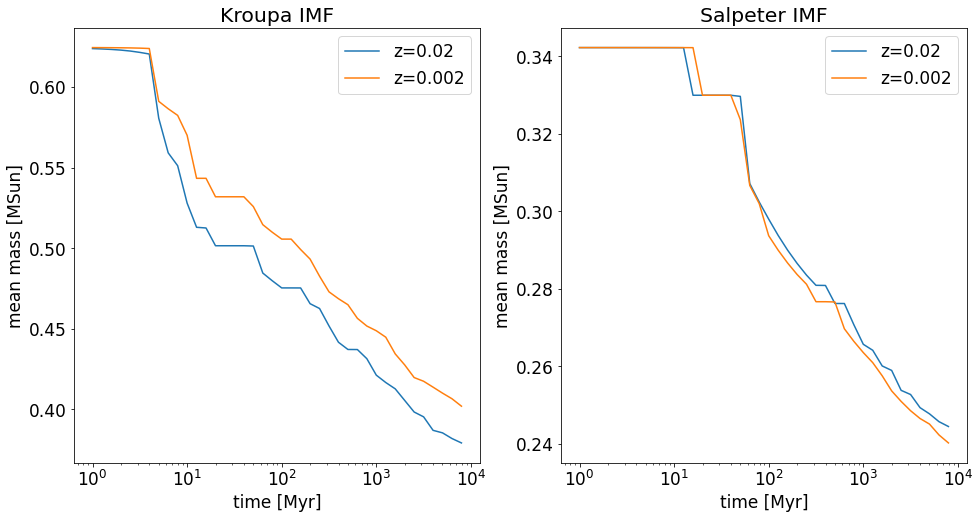

In [9]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
ax1.plot(times.number, kmean1, label="z=0.02")
ax1.plot(times.number, kmean2, label="z=0.002")
ax1.set_title("Kroupa IMF")
ax2.plot(times.number, smean1, label="z=0.02")
ax2.plot(times.number, smean2, label="z=0.002")
ax2.set_title("Salpeter IMF")
for ax in [ax1, ax2]:
    ax.set(ylabel="mean mass [MSun]", xlabel="time [Myr]")
    ax.semilogx()
    ax.legend()
plt.show()

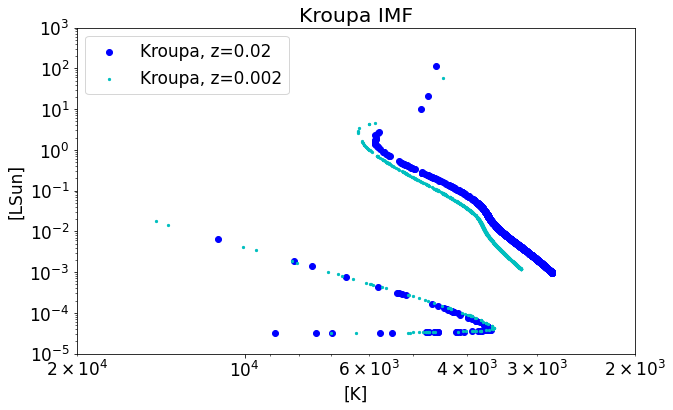

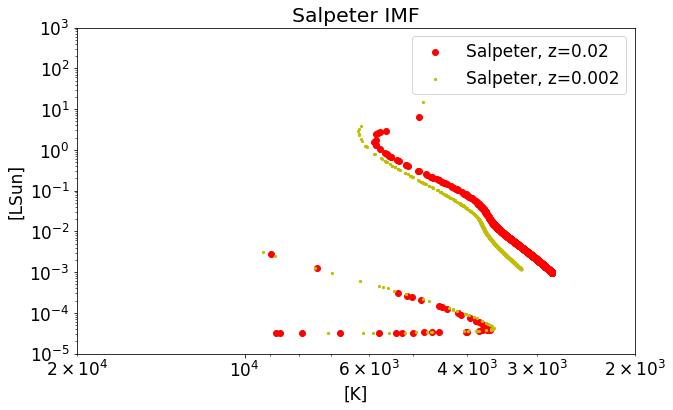

In [10]:
scatter(k_stars1.temperature, k_stars1.luminosity, c='b', label='Kroupa, z=0.02')
scatter(k_stars2.temperature, k_stars2.luminosity, c='c', s=5, label='Kroupa, z=0.002')
plt.xlim(2.e+4, 2000)
plt.ylim(1.e-5, 1000)
plt.loglog()
plt.legend()
plt.title("Kroupa IMF")
plt.show()

scatter(s_stars1.temperature, s_stars1.luminosity, c='r', label='Salpeter, z=0.02')
scatter(s_stars2.temperature, s_stars2.luminosity, c='y', s=5, label='Salpeter, z=0.002')
plt.xlim(2.e+4, 2000)
plt.ylim(1.e-5, 1000)
plt.loglog()
plt.legend()
plt.title("Salpeter IMF")
plt.show()

In [11]:
def describe_types(stars, descr=''):
    print('\n',descr)
    types = stars.stellar_type
    #print(np.unique(types))
    print("Number of main-sequence stars:", np.count_nonzero(types.number==1))
    #print("Number of Hertzsprung gap stars:", np.count_nonzero(types.number==2))
    #print("Number of first giant branch stars:", np.count_nonzero(types.number==3))
    #print("Number of core helium burning stars:", np.count_nonzero(types.number==4))
    #print("Number of white dwarfs:", np.count_nonzero(types.number==10)+np.count_nonzero(types.number==11)+np.count_nonzero(types.number==12))
    #print("Number of neutron stars:", np.count_nonzero(types.number==13))
    #print("Number of black holes:", np.count_nonzero(types.number==14))
    
    print("Number of compact objects:", np.count_nonzero(types.number==10)+np.count_nonzero(types.number==11)
        +np.count_nonzero(types.number==12)+np.count_nonzero(types.number==13)+np.count_nonzero(types.number==14))
    

describe_types(k_stars1, "Kroupa IMF, z=0.02")
describe_types(k_stars2, "Kroupa IMF, z=0.002")
describe_types(s_stars1, "Salpeter IMF, z=0.02")
describe_types(s_stars2, "Salpeter IMF, z=0.002")


 Kroupa IMF, z=0.02
Number of main-sequence stars: 944
Number of compact objects: 77

 Kroupa IMF, z=0.002
Number of main-sequence stars: 927
Number of compact objects: 96

 Salpeter IMF, z=0.02
Number of main-sequence stars: 980
Number of compact objects: 42

 Salpeter IMF, z=0.002
Number of main-sequence stars: 971
Number of compact objects: 52


### Question 1:
Is there a difference in the number of compact objects (white dwarfs, neutron stars, black holes; these types are defined [here](https://github.com/amusecode/amuse/blob/main/src/amuse/units/units.py), and e.g. 1.|stellar_type corresponds to a main sequene star) in the populations with different initial mass functions, and with different metallicities, and is this difference statistically significant?

<span style="color:purple;font-weight:700">
The Kroupa IMF has significantly more compact objects than the Salpeter IMF, and the lower metallicity corresponds to a slightly higher number of compact objects too. 
</span>

Is a similar difference also noticeable in the number of main sequence stars?

<span style="color:purple;font-weight:700">
    Yes
</span>

### Assignment 3:
Calculate, instead of the mean mass, the total luminosity and luminosity-weighted temperature ($T_{LW}=(\Sigma_iL_iT_i)/(\Sigma_iL_i)$, the effective color of the integrated stellar population) of the entire population of stars as a function of time.

Make a plot of these parameters for both mass functions, and both metallicities. 

In [12]:
n_stars = 1024
mmin = 0.1 | units.MSun
mmax = 100 | units.MSun

def start_stellar_code(stars, z=.02):
    stellar = SeBa()
    stellar.parameters.metallicity = z
    stellar.particles.add_particles(stars)
    channels = {"to_stars": stellar.particles.new_channel_to(stars), 
                "to_stellar": stars.new_channel_to(stellar.particles)}
    return stellar, channels

times = 10**np.arange(0.0, 4.0, 0.1) | units.Myr
lum_kmean1 = []
tlw_kmean1 = []
lum_kmean2 = []
tlw_kmean2 = []
lum_smean1 = []
tlw_smean1 = []
lum_smean2 = []
tlw_smean2 = []

mkroupa = new_kroupa_mass_distribution(n_stars, mass_min=mmin, mass_max=mmax)

k_stars1 = Particles(mass=mkroupa)
kstellar1, kchannels1 = start_stellar_code(k_stars1)

k_stars2 = Particles(mass=mkroupa)
kstellar2, kchannels2 = start_stellar_code(k_stars2, z=0.002)

for time in times:
    kstellar1.evolve_model(time)
    kchannels1["to_stars"].copy()
    kstellar2.evolve_model(time)
    kchannels2["to_stars"].copy()
    lum_kmean1.append(np.sum(k_stars1.luminosity).number)
    tlw_kmean1.append((np.sum(k_stars1.luminosity * k_stars1.temperature) / np.sum(k_stars1.luminosity)).number)
    lum_kmean2.append(np.sum(k_stars2.luminosity).number)
    tlw_kmean2.append((np.sum(k_stars2.luminosity * k_stars2.temperature) / np.sum(k_stars2.luminosity)).number)
kstellar1.stop()
kstellar2.stop()


msalpeter = new_salpeter_mass_distribution(n_stars, mass_min=mmin, mass_max=mmax)

s_stars1 = Particles(mass=msalpeter)
sstellar1, schannels1 = start_stellar_code(s_stars1)

s_stars2 = Particles(mass=msalpeter)
sstellar2, schannels2 = start_stellar_code(s_stars2, z=0.002)

for time in times:
    sstellar1.evolve_model(time)
    schannels1["to_stars"].copy()
    sstellar2.evolve_model(time)
    schannels2["to_stars"].copy()
    lum_smean1.append(np.sum(s_stars1.luminosity).number)
    tlw_smean1.append((np.sum(s_stars1.luminosity * s_stars1.temperature) / np.sum(s_stars1.luminosity)).number)
    lum_smean2.append(np.sum(s_stars2.luminosity).number)
    tlw_smean2.append((np.sum(s_stars2.luminosity * s_stars2.temperature) / np.sum(s_stars2.luminosity)).number)
sstellar1.stop()
sstellar2.stop()
print("total luminosity for Kroupa, z=0.02: ", np.sum(k_stars1.luminosity))
print("total luminosity for Kroupa, z=0.002: ", np.sum(k_stars2.luminosity))
print("total luminosity for Salpeter, z=0.02: ", np.sum(s_stars1.luminosity))
print("total luminosity for Salpeter, z=0.002: ", np.sum(s_stars2.luminosity))

total luminosity for Kroupa, z=0.02:  76.9201036783 LSun
total luminosity for Kroupa, z=0.002:  248.465011193 LSun
total luminosity for Salpeter, z=0.02:  31.4391898152 LSun
total luminosity for Salpeter, z=0.002:  51.6732498484 LSun


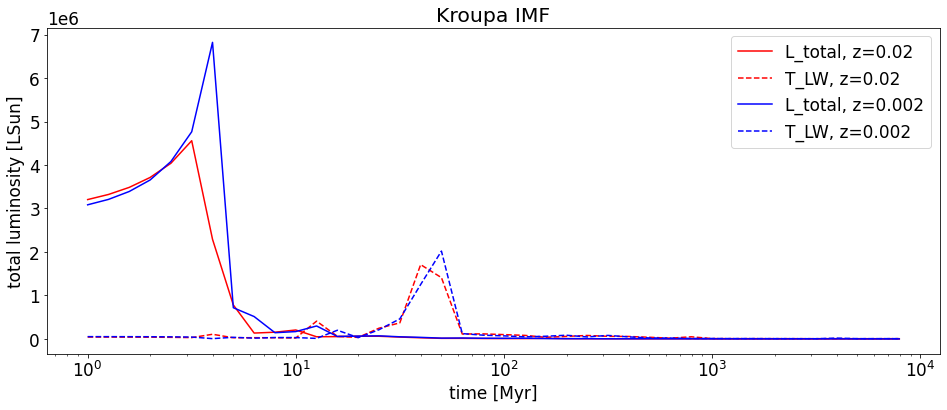

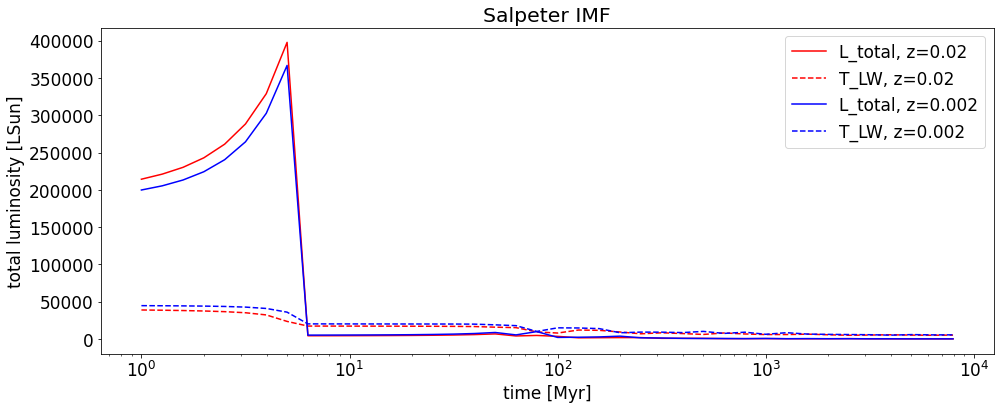

In [13]:
fig, ax1 = plt.subplots(figsize=(16,6))
#ax2 = ax1.twinx()
ax1.plot(times.number, lum_kmean1, c='r', label="L_total, z=0.02")
ax1.plot(times.number, tlw_kmean1, c='r', linestyle='--', label="T_LW, z=0.02")
ax1.plot(times.number, lum_kmean2, c='b', label="L_total, z=0.002")
ax1.plot(times.number, tlw_kmean2, c='b', linestyle='--', label="T_LW, z=0.002")
ax1.set_title("Kroupa IMF")
for ax in [ax1]:
    ax.set_xlabel("time [Myr]")
    ax.semilogx()
    ax.legend()
ax1.set_ylabel("total luminosity [LSun]")
plt.show()

fig, ax1 = plt.subplots(figsize=(16,6))
#ax2 = ax1.twinx()
ax1.plot(times.number, lum_smean1, c='r', label="L_total, z=0.02")
ax1.plot(times.number, tlw_smean1, c='r', linestyle='--', label="T_LW, z=0.02")
ax1.plot(times.number, lum_smean2, c='b', label="L_total, z=0.002")
ax1.plot(times.number, tlw_smean2, c='b', linestyle='--', label="T_LW, z=0.002")
ax1.set_title("Salpeter IMF")
for ax in [ax1]:
    ax.set_xlabel("time [Myr]")
    ax.semilogx()
    ax.legend()
ax1.set_ylabel("total luminosity [LSun]")
plt.show()

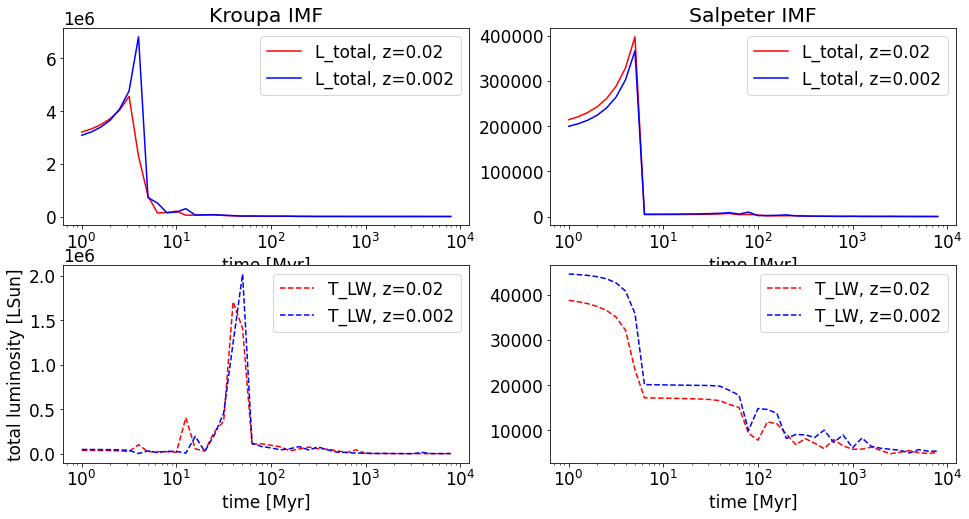

In [14]:
fig, ([ax1, ax2], [ax1a, ax2a]) = plt.subplots(2,2, figsize=(16,8))
ax1.plot(times.number, lum_kmean1, c='r', label="L_total, z=0.02")
ax1a.plot(times.number, tlw_kmean1, c='r', linestyle='--', label="T_LW, z=0.02")
ax1.plot(times.number, lum_kmean2, c='b', label="L_total, z=0.002")
ax1a.plot(times.number, tlw_kmean2, c='b', linestyle='--', label="T_LW, z=0.002")
ax1.set_title("Kroupa IMF")

ax2.plot(times.number, lum_smean1, c='r', label="L_total, z=0.02")
ax2a.plot(times.number, tlw_smean1, c='r', linestyle='--', label="T_LW, z=0.02")
ax2.plot(times.number, lum_smean2, c='b', label="L_total, z=0.002")
ax2a.plot(times.number, tlw_smean2, c='b', linestyle='--', label="T_LW, z=0.002")
ax2.set_title("Salpeter IMF")
for ax in [ax1, ax2, ax1a, ax2a]:
    ax.set_xlabel("time [Myr]")
    ax.semilogx()
    ax.legend()
ax1a.set_ylabel("total luminosity [LSun]")
plt.show()

### Question 4:
Can one, based on observational differences in luminosity and integrated temperature, make a distinction between the two mass functions?

<span style="color:purple;font-weight:700">
    For the Kroupa IMF, the maximum values of T_LW and the total luminosity are of similar order of magnitude, while for the Salpeter IMF the maximum value for T_LW is around a factor 10 larger than the maximum value for the total luminosity.
</span>